In [ ]:
Projet4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as st
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic
from pylab import figure, axes, pie, title, show

In [3]:
custom = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/customers.csv')
prod = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/products.csv')
transac = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/transactions.csv')

custom.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
prod.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
transac.head(5)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [6]:
df1= prod.merge(transac, 'right')
df1.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768


In [7]:


df = pd.merge(left=prod,right=transac,how='outer',on='id_prod')

df = pd.merge(left=custom,right=df, how='outer',on='client_id')
df

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [8]:
df.columns = ['custom_id', 'custom_sex', 'custom_birth', 'prod_id', 'prod_price', 'prod_cat', 'transac_date', 'transac_sess_id']

In [9]:
df

,custom_id,custom_sex,custom_birth,prod_id,prod_price,prod_cat,transac_date,transac_sess_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [10]:
df_na = df.loc[df.isnull().any(axis=1)]

In [11]:
prod_invendus_id = df_na.loc[df.custom_id.isnull(), 'prod_id'].unique()

In [12]:
custom_ss_achat_id = df_na.loc[df.prod_id.isnull(), 'custom_id'].unique()

Nettoyage des datas

In [13]:
df['data_info'] = np.nan

In [14]:
df = df.loc[~(df.custom_id.notnull() & (df.custom_id.str.contains('ct')))]

In [15]:
df.head(100)


,custom_id,custom_sex,custom_birth,prod_id,prod_price,prod_cat,transac_date,transac_sess_id,data_info
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,NaN
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,NaN
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,NaN
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,NaN
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,NaN
...,...,...,...,...,...,...,...,...,...
95,c_5961,f,1962.0,1_462,16.66,1.0,2021-07-19 10:11:19.740451,s_64360,NaN
96,c_5961,f,1962.0,1_110,54.90,1.0,2021-09-28 04:03:42.733433,s_96682,NaN
97,c_5320,m,1943.0,0_992,8.58,0.0,2021-07-28 02:05:11.856849,s_68036,NaN
98,c_5320,m,1943.0,1_708,23.06,1.0,2021-09-07 10:48:16.858288,s_86300,NaN


In [16]:
test = df[['prod_id', 'prod_cat']].copy()
test['equal'] = test['prod_id'].str[0] == test['prod_cat'].astype(str).str[0]

In [17]:
test[test['prod_id'].notnull()& test['prod_cat'].notnull()].equal.all()

True

In [18]:
test

,prod_id,prod_cat,equal
0,1_385,1.0,True
1,0_1110,0.0,True
2,0_1111,0.0,True
3,1_461,1.0,True
4,1_536,1.0,True
...,...,...,...
337054,0_525,0.0,True
337055,2_86,2.0,True
337056,0_299,0.0,True
337057,0_510,0.0,True


In [19]:


cat = 0
df.loc[df.prod_id=='0_2245', 'prod_cat'] = cat

c:\users\philippe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
cat1_price_mean = df.loc[df.prod_cat == cat, 'prod_price'].mean()
df.loc[df.prod_id=='0_2245', 'prod_price'] = cat1_price_mean

In [21]:
df.loc[df.prod_id=='0_2245', 'data_info'] = 'product_imputation'

In [22]:
df.loc[df.prod_id=='0_2245', ['prod_id', 'prod_cat', 'prod_price']].drop_duplicates()

,prod_id,prod_cat,prod_price
2678,0_2245,0.0,10.647072


In [23]:
def datadate(value):
    if pd.isnull(value):
        return value
    else:
        return datetime.strptime(value, '%Y-%m-%d %H:%M:%S.%f')

In [24]:
df['transac_date'] = df['transac_date'].apply(datadate)

<ipython-input-24-2c2e6d4a908f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_date'] = df['transac_date'].apply(datadate)


In [25]:
df['prod_cat'] = df['prod_cat'].fillna(-1)
df['prod_cat'] = df['prod_cat'].apply(lambda x: str(int(x)))
df['prod_cat'] = df['prod_cat'].replace('-1', np.nan)

<ipython-input-25-1edc2f3c23a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_cat'] = df['prod_cat'].fillna(-1)
<ipython-input-25-1edc2f3c23a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_cat'] = df['prod_cat'].apply(lambda x: str(int(x)))
<ipython-input-25-1edc2f3c23a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [26]:
df['transac_acheteur_age'] = df['transac_date'].dt.year - df['custom_birth']

<ipython-input-26-267d76c84ce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_acheteur_age'] = df['transac_date'].dt.year - df['custom_birth']


In [27]:
df

,custom_id,custom_sex,custom_birth,prod_id,prod_price,prod_cat,transac_date,transac_sess_id,data_info,transac_acheteur_age
0,c_4410,f,1967.0,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707,NaN,54.0
1,c_4410,f,1967.0,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715,NaN,54.0
2,c_4410,f,1967.0,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707,NaN,54.0
3,c_4410,f,1967.0,1_461,12.99,1,2021-08-11 08:40:47.495793,s_74236,NaN,54.0
4,c_4410,f,1967.0,1_536,11.21,1,2022-01-18 17:05:07.468131,s_151740,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0,NaT,NaN,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2,NaT,NaN,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0,NaT,NaN,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0,NaT,NaN,NaN,NaN


In [28]:
def split_age(age):
    tranches = [
        {'bornes': (0,30), 'label': '30-'},
        {'bornes': (31,50), 'label': '31-50'},
        {'bornes': (51,70), 'label': '51-70'},
        {'bornes': (71,120),'label': '71+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= age <= t['bornes'][1]:
            return t['label']

In [29]:
df['transac_acheteur_age_range'] = df['transac_acheteur_age'].apply(split_age)

<ipython-input-29-a3a566fa2682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_acheteur_age_range'] = df['transac_acheteur_age'].apply(split_age)


In [30]:
annee = 2022
df['custom_age']  = annee - df['custom_birth']

<ipython-input-30-f1e0dd66bda7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_age']  = annee - df['custom_birth']


In [31]:
df['custom_age_range'] = df['custom_age'].apply(split_age)

<ipython-input-31-0ec315efb45f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_age_range'] = df['custom_age'].apply(split_age)


<ipython-input-32-dd28e6b0229f>:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  df[['custom_id', 'custom_age']].drop_duplicates().custom_age.plot('hist', bins=100)


[]

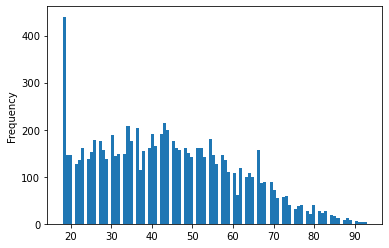

In [32]:
df[['custom_id', 'custom_age']].drop_duplicates().custom_age.plot('hist', bins=100)
plt.plot()

In [33]:
df.loc[df.custom_age == 18, 'data_info'] = 'age_out'

In [34]:

df['transac_month'] = df['transac_date'].dt.month

df['transac_month_part'] = (df['transac_date'].dt.day / (df['transac_date'].dt.days_in_month/4+1)).apply(lambda x: str(x)[0])

df['transac_weekday'] = df['transac_date'].dt.dayofweek

df['transac_hour'] = df['transac_date'].dt.hour

<ipython-input-34-722094bfc020>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_month'] = df['transac_date'].dt.month
<ipython-input-34-722094bfc020>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_month_part'] = (df['transac_date'].dt.day / (df['transac_date'].dt.days_in_month/4+1)).apply(lambda x: str(x)[0])
<ipython-input-34-722094bfc020>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [35]:
def split_price(price):
    tranches = [
        {'bornes': (0,4),  'label': 'very_cheap 3-'},
        {'bornes': (4,10), 'label': 'cheap 4-9'},
        {'bornes': (10,20), 'label': 'medium 10-19'},
        {'bornes': (20,80), 'label': 'expensive 20-79'},
        {'bornes': (80,500), 'label': 'very_expansive 80+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= price < t['bornes'][1]:
            return t['label']

In [36]:
df['prod_price_range'] = df['prod_price'].apply(split_price)

<ipython-input-36-a149273ddd18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_price_range'] = df['prod_price'].apply(split_price)


In [37]:
df = df[[
    'custom_id',
    'custom_sex',
    'custom_birth',
    'custom_age',
    'custom_age_range',
    
    'prod_id',
    'prod_cat',
    'prod_price',
    'prod_price_range',
    
    'transac_sess_id',
    'transac_acheteur_age',
    'transac_acheteur_age_range',
    
    'transac_date',
    'transac_hour',
    'transac_weekday',
    'transac_month_part',
    'transac_month',
    
    'data_info'
]]

In [38]:
df

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,NaN,None,0_525,0,2.99,very_cheap 3-,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337055,NaN,NaN,NaN,NaN,None,2_86,2,132.36,very_expansive 80+,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337056,NaN,NaN,NaN,NaN,None,0_299,0,22.99,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337057,NaN,NaN,NaN,NaN,None,0_510,0,23.66,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN


In [39]:
products_unsold = df.loc[df['prod_id'].isin(prod_invendus_id), ['prod_id', 'prod_cat', 'prod_price', 'prod_price_range']]

In [40]:
customs_no_purchase = df.loc[df['custom_id'].isin(custom_ss_achat_id), ['custom_id', 'custom_sex', 'custom_birth', 'custom_age', 'custom_age_range']]

In [41]:
transacdata = df.dropna(subset=['custom_id', 'custom_sex', 'custom_birth', 'custom_age', 'custom_age_range', 'prod_id', 'prod_cat',
       'prod_price', 'prod_price_range', 'transac_sess_id', 'transac_acheteur_age',
       'transac_acheteur_age_range', 'transac_date', 'transac_hour', 'transac_weekday', 'transac_month_part',
       'transac_month'])

In [42]:
products_unsold.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/produits_invendus.csv', index=False)
customs_no_purchase.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/clients_sans_achat.csv', index=False)
transacdata.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/transactionss.csv', index=False)

In [43]:
transacdata.head()

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN


In [44]:
transacdata.dtypes

custom_id                             object
custom_sex                            object
custom_birth                         float64
custom_age                           float64
custom_age_range                      object
prod_id                               object
prod_cat                              object
prod_price                           float64
prod_price_range                      object
transac_sess_id                       object
transac_acheteur_age                 float64
transac_acheteur_age_range            object
transac_date                  datetime64[ns]
transac_hour                         float64
transac_weekday                      float64
transac_month_part                    object
transac_month                        float64
data_info                             object
dtype: object

In [45]:
transacdata['transac_date'].min()

Timestamp('2021-03-01 00:01:07.843138')

In [46]:
transacdata['transac_date'].max()

Timestamp('2022-02-28 23:59:58.040472')

In [47]:
transacdata['ca'] = np.cumsum(transacdata.prod_price)
transacdata

<ipython-input-47-cd55f3423b4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacdata['ca'] = np.cumsum(transacdata.prod_price)


,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info,ca
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN,2.599000e+01
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN,3.070000e+01
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN,5.069000e+01
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN,6.368000e+01
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN,7.489000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337032,c_84,f,1982.0,40.0,31-50,0_1452,0,13.77,medium 10-19,s_92701,39.0,31-50,2021-09-20 10:11:35.510099,10.0,0.0,2,9.0,NaN,5.797572e+06
337033,c_84,f,1982.0,40.0,31-50,1_158,1,22.17,expensive 20-79,s_98493,39.0,31-50,2021-10-01 16:11:20.841361,16.0,4.0,0,10.0,NaN,5.797594e+06
337034,c_84,f,1982.0,40.0,31-50,0_1438,0,9.31,cheap 4-9,s_141701,39.0,31-50,2021-12-29 06:11:50.316631,6.0,2.0,3,12.0,NaN,5.797604e+06
337035,c_84,f,1982.0,40.0,31-50,1_459,1,15.99,medium 10-19,s_166337,40.0,31-50,2022-02-17 00:16:56.629536,0.0,3.0,2,2.0,NaN,5.797620e+06


In [48]:
df55 = transacdata[['prod_cat', 'ca']].groupby(['prod_cat']).agg({'ca':['sum', 'count']}).reset_index()
df55

prod_cat            ca        
                     sum   count
0        0  6.141750e+11  209529
1        1  3.240478e+11  109735
2        2  4.864484e+10   17552

In [49]:
transacdata.dtypes

custom_id                             object
custom_sex                            object
custom_birth                         float64
custom_age                           float64
custom_age_range                      object
prod_id                               object
prod_cat                              object
prod_price                           float64
prod_price_range                      object
transac_sess_id                       object
transac_acheteur_age                 float64
transac_acheteur_age_range            object
transac_date                  datetime64[ns]
transac_hour                         float64
transac_weekday                      float64
transac_month_part                    object
transac_month                        float64
data_info                             object
ca                                   float64
dtype: object

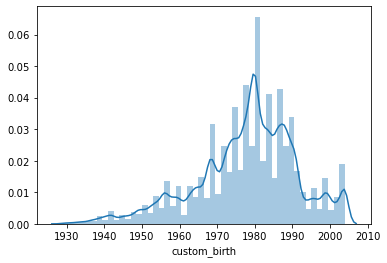

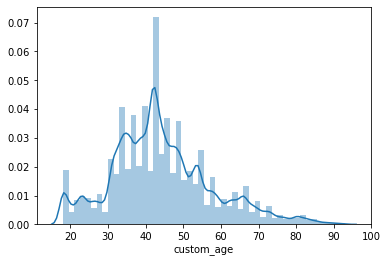

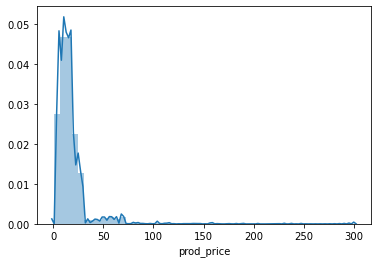

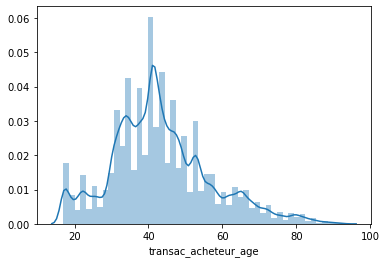

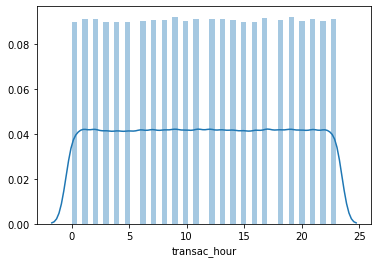

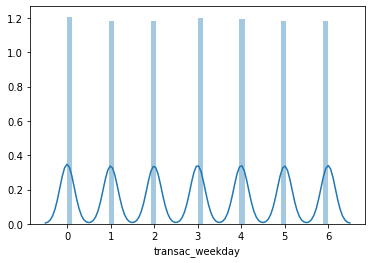

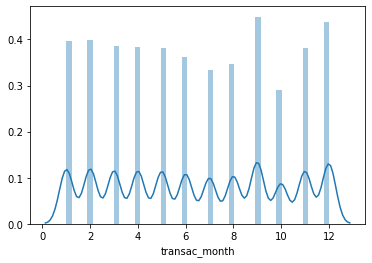

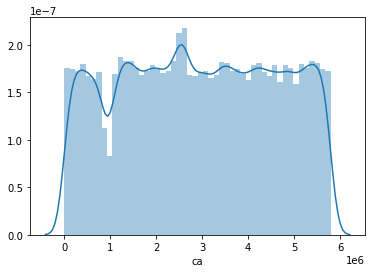

In [50]:
for col in transacdata.select_dtypes('float'):
    plt.figure()
    sns.distplot(transacdata[col])

In [51]:
transacdata

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info,ca
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN,2.599000e+01
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN,3.070000e+01
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN,5.069000e+01
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN,6.368000e+01
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN,7.489000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337032,c_84,f,1982.0,40.0,31-50,0_1452,0,13.77,medium 10-19,s_92701,39.0,31-50,2021-09-20 10:11:35.510099,10.0,0.0,2,9.0,NaN,5.797572e+06
337033,c_84,f,1982.0,40.0,31-50,1_158,1,22.17,expensive 20-79,s_98493,39.0,31-50,2021-10-01 16:11:20.841361,16.0,4.0,0,10.0,NaN,5.797594e+06
337034,c_84,f,1982.0,40.0,31-50,0_1438,0,9.31,cheap 4-9,s_141701,39.0,31-50,2021-12-29 06:11:50.316631,6.0,2.0,3,12.0,NaN,5.797604e+06
337035,c_84,f,1982.0,40.0,31-50,1_459,1,15.99,medium 10-19,s_166337,40.0,31-50,2022-02-17 00:16:56.629536,0.0,3.0,2,2.0,NaN,5.797620e+06


In [52]:
df1 =transacdata.groupby('transac_date')['ca'].sum().reset_index()
df1
df2 = df1.set_index('transac_date')
df2

,ca
transac_date,
2021-03-01 00:01:07.843138,2.406878e+04
2021-03-01 00:02:26.047414,2.417576e+06
2021-03-01 00:02:38.311413,1.749976e+06
2021-03-01 00:04:54.559692,3.282289e+06
2021-03-01 00:05:18.801198,1.694872e+06
...,...
2022-02-28 23:56:57.196281,3.034476e+06
2022-02-28 23:56:57.561424,3.592793e+06
2022-02-28 23:57:12.741573,1.024757e+06


In [56]:
df223 = df2['2021-03-01 00:01':'2021-03-01 13:55']
df223

,ca
transac_date,
2021-03-01 00:01:07.843138,2.406878e+04
2021-03-01 00:02:26.047414,2.417576e+06
2021-03-01 00:02:38.311413,1.749976e+06
2021-03-01 00:04:54.559692,3.282289e+06
2021-03-01 00:05:18.801198,1.694872e+06
...,...
2021-03-01 13:53:36.919272,9.369476e+05
2021-03-01 13:53:52.105944,3.428460e+06
2021-03-01 13:55:14.079496,5.177374e+06


In [57]:
df222 = df2['2021-03':'2022-02']
df222

,ca
transac_date,
2021-03-01 00:01:07.843138,2.406878e+04
2021-03-01 00:02:26.047414,2.417576e+06
2021-03-01 00:02:38.311413,1.749976e+06
2021-03-01 00:04:54.559692,3.282289e+06
2021-03-01 00:05:18.801198,1.694872e+06
...,...
2022-02-28 23:56:57.196281,3.034476e+06
2022-02-28 23:56:57.561424,3.592793e+06
2022-02-28 23:57:12.741573,1.024757e+06


<ipython-input-58-6d19a497fd78>:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  df222.resample('2W', how= 'mean').plot()


<Figure size 864x576 with 0 Axes>

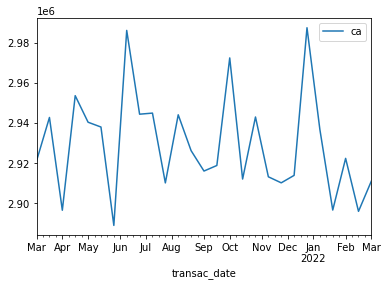

In [58]:
plt.figure(figsize= (12,8))
df222.resample('2W', how= 'mean').plot()
plt.show()

<ipython-input-59-83839dd9203f>:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()
  df222.resample('2W', how= 'std').plot()


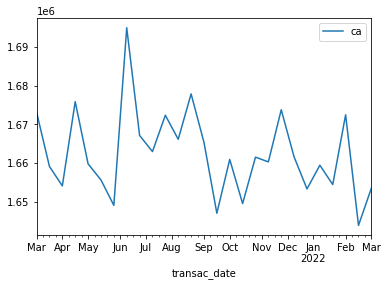

In [59]:
df222.resample('2W', how= 'std').plot()

<ipython-input-230-45f0c449da56>:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  df222.resample('H', how= 'sum').plot()


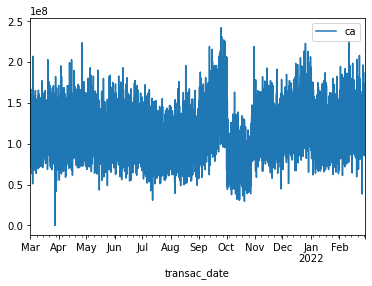

In [230]:
df222.resample('H', how= 'sum').plot()

In [60]:
df222.resample('2W').agg(['mean', 'std','min','max'])

ca                                     
                      mean           std      min           max
transac_date                                                   
2021-03-07    2.921209e+06  1.673101e+06  5714.60  5.796865e+06
2021-03-21    2.942826e+06  1.659085e+06   375.14  5.797467e+06
2021-04-04    2.896481e+06  1.654071e+06    25.99  5.797150e+06
2021-04-18    2.953714e+06  1.675848e+06   602.68  5.797552e+06
2021-05-02    2.940449e+06  1.659768e+06   547.84  5.796689e+06
2021-05-16    2.938051e+06  1.655608e+06   861.61  5.797144e+06
2021-05-30    2.888902e+06  1.649031e+06   241.01  5.797175e+06
2021-06-13    2.986318e+06  1.694980e+06  1856.93  5.796359e+06
2021-06-27    2.944462e+06  1.667131e+06  1116.11  5.796871e+06
2021-07-11    2.945006e+06  1.662935e+06   654.70  5.797192e+06
2021-07-25    2.910138e+06  1.672340e+06   966.73  5.796322e+06
2021-08-08    2.944162e+06  1.666125e+06   220.02  5.797163e+06
2021-08-22    2.926249e+06  1.677867e+06    63.68  5.797361e+06
2021-09-05    2.916061e+06  1.665328e+06  1012.14  5.796945e+06
2021-09-19    2.918839e+06  1.646986e+06  1528.11  5.797674e+06
2021-10-03    2.972573e+06  1.660917e+06   107.16  5.797594e+06
2021-10-17    2.912067e+06  1.649496e+06   520.66  5.797048e+06
2021-10-31    2.943063e+06  1.661500e+06   351.16  5.797558e+06
2021-11-14    2.913187e+06  1.660278e+06    30.70  5.796971e+06
2021-11-28    2.910175e+06  1.673757e+06   628.67  5.795958e+06
2021-12-12    2.913899e+06  1.661546e+06   136.18  5.797293e+06
2021-12-26    2.987652e+06  1.653283e+06   395.13  5.796893e+06
2022-01-09    2.936839e+06  1.659413e+06   288.19  5.797604e+06
2022-01-23    2.896576e+06  1.654404e+06    74.89  5.796593e+06
2022-02-06    2.922392e+06  1.672457e+06   419.69  5.796705e+06
2022-02-20    2.895930e+06  1.643843e+06  1038.14  5.797620e+06
2022-03-06    2.911067e+06  1.653474e+06  3119.63  5.796553e+06

In [61]:
m= df222.resample('2W').agg(['mean', 'std','min','max'])
m

ca                                     
                      mean           std      min           max
transac_date                                                   
2021-03-07    2.921209e+06  1.673101e+06  5714.60  5.796865e+06
2021-03-21    2.942826e+06  1.659085e+06   375.14  5.797467e+06
2021-04-04    2.896481e+06  1.654071e+06    25.99  5.797150e+06
2021-04-18    2.953714e+06  1.675848e+06   602.68  5.797552e+06
2021-05-02    2.940449e+06  1.659768e+06   547.84  5.796689e+06
2021-05-16    2.938051e+06  1.655608e+06   861.61  5.797144e+06
2021-05-30    2.888902e+06  1.649031e+06   241.01  5.797175e+06
2021-06-13    2.986318e+06  1.694980e+06  1856.93  5.796359e+06
2021-06-27    2.944462e+06  1.667131e+06  1116.11  5.796871e+06
2021-07-11    2.945006e+06  1.662935e+06   654.70  5.797192e+06
2021-07-25    2.910138e+06  1.672340e+06   966.73  5.796322e+06
2021-08-08    2.944162e+06  1.666125e+06   220.02  5.797163e+06
2021-08-22    2.926249e+06  1.677867e+06    63.68  5.797361e+06
2021-09-05    2.916061e+06  1.665328e+06  1012.14  5.796945e+06
2021-09-19    2.918839e+06  1.646986e+06  1528.11  5.797674e+06
2021-10-03    2.972573e+06  1.660917e+06   107.16  5.797594e+06
2021-10-17    2.912067e+06  1.649496e+06   520.66  5.797048e+06
2021-10-31    2.943063e+06  1.661500e+06   351.16  5.797558e+06
2021-11-14    2.913187e+06  1.660278e+06    30.70  5.796971e+06
2021-11-28    2.910175e+06  1.673757e+06   628.67  5.795958e+06
2021-12-12    2.913899e+06  1.661546e+06   136.18  5.797293e+06
2021-12-26    2.987652e+06  1.653283e+06   395.13  5.796893e+06
2022-01-09    2.936839e+06  1.659413e+06   288.19  5.797604e+06
2022-01-23    2.896576e+06  1.654404e+06    74.89  5.796593e+06
2022-02-06    2.922392e+06  1.672457e+06   419.69  5.796705e+06
2022-02-20    2.895930e+06  1.643843e+06  1038.14  5.797620e+06
2022-03-06    2.911067e+06  1.653474e+06  3119.63  5.796553e+06

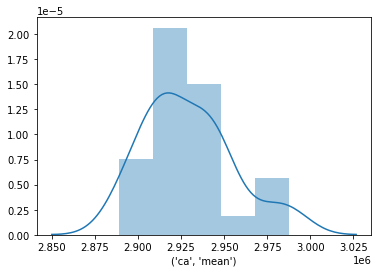

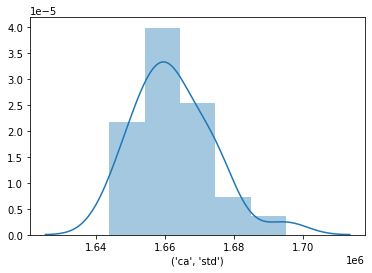

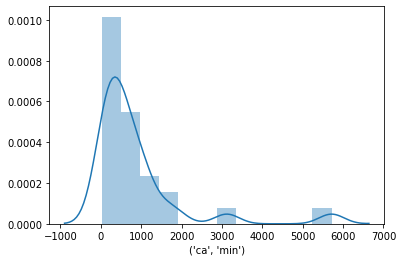

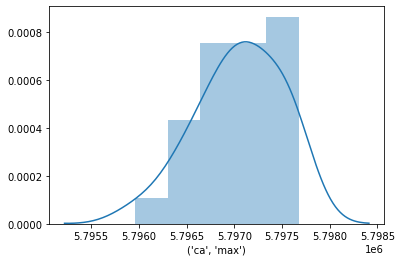

In [62]:
for col in m.select_dtypes('float'):
    plt.figure()
    sns.distplot(m[col])

In [62]:
transacdata

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info,ca
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN,2.599000e+01
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN,3.070000e+01
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN,5.069000e+01
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN,6.368000e+01
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN,7.489000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337032,c_84,f,1982.0,40.0,31-50,0_1452,0,13.77,medium 10-19,s_92701,39.0,31-50,2021-09-20 10:11:35.510099,10.0,0.0,2,9.0,NaN,5.797572e+06
337033,c_84,f,1982.0,40.0,31-50,1_158,1,22.17,expensive 20-79,s_98493,39.0,31-50,2021-10-01 16:11:20.841361,16.0,4.0,0,10.0,NaN,5.797594e+06
337034,c_84,f,1982.0,40.0,31-50,0_1438,0,9.31,cheap 4-9,s_141701,39.0,31-50,2021-12-29 06:11:50.316631,6.0,2.0,3,12.0,NaN,5.797604e+06
337035,c_84,f,1982.0,40.0,31-50,1_459,1,15.99,medium 10-19,s_166337,40.0,31-50,2022-02-17 00:16:56.629536,0.0,3.0,2,2.0,NaN,5.797620e+06


In [63]:
df11 =transacdata.groupby('transac_sess_id')['ca'].sum().reset_index()
df11

,transac_sess_id,ca
0,s_1,2.406878e+04
1,s_10,1.545086e+06
2,s_100,5.677411e+06
3,s_1000,1.709040e+06
4,s_10000,1.577489e+06
...,...,...
169189,s_99994,1.607331e+07
169190,s_99995,1.877363e+06
169191,s_99996,1.602030e+07
169192,s_99997,3.835653e+06


In [64]:
x = df11.transac_sess_id
y= df11.ca

MISSION 2

In [128]:
products_unsold = pd.read_csv(r'C:\Users\Philippe\Documents\python\scripts\P4\produits_invendus.csv')
customs_no_purchase = pd.read_csv(r'C:\Users\Philippe\Documents\python\scripts\P4\clients_sans_achat.csv')
transacdata = pd.read_csv(r'C:\Users\Philippe\Documents\python\scripts\P4\transactionss.csv', parse_dates=[12])

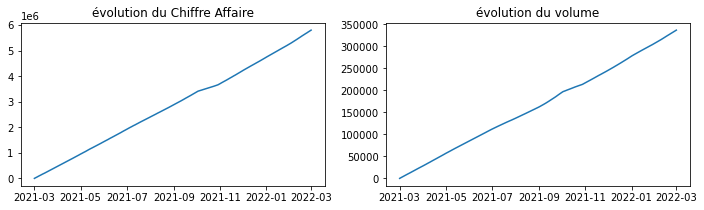

<Figure size 432x288 with 0 Axes>

In [129]:
df = transacdata[['transac_date', 'prod_price']]
df = df.sort_values('transac_date').reset_index()
df['ca'] = np.cumsum(df.prod_price)
df['vol'] = pd.Series(range(len(df))) + 1

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.plot(df['transac_date'], df['ca'])
plt.title('évolution du Chiffre Affaire')

plt.subplot(1,2,2)
plt.plot(df['transac_date'], df['vol'])
plt.title('évolution du volume')
plt.show()

plt.savefig('evolutionCA-Vol')


In [130]:
dates = transacdata.transac_date.sort_values().values
print(f'transactions de {dates[0]:} à {dates[-1]}')

transactions de 2021-03-01T00:01:07.843138000 à 2022-02-28T23:59:58.040472000


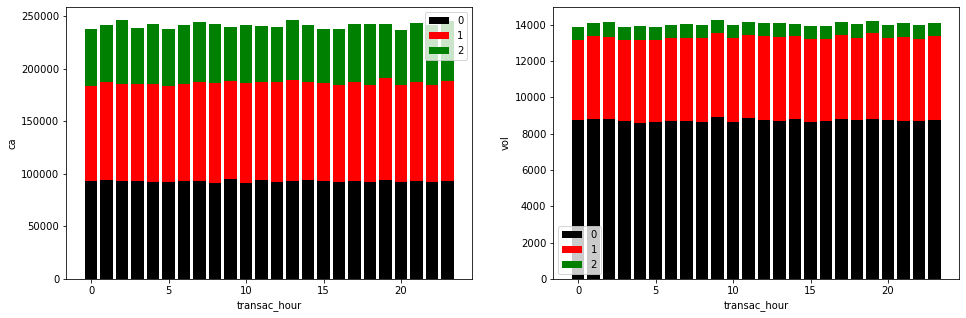

<Figure size 432x288 with 0 Axes>

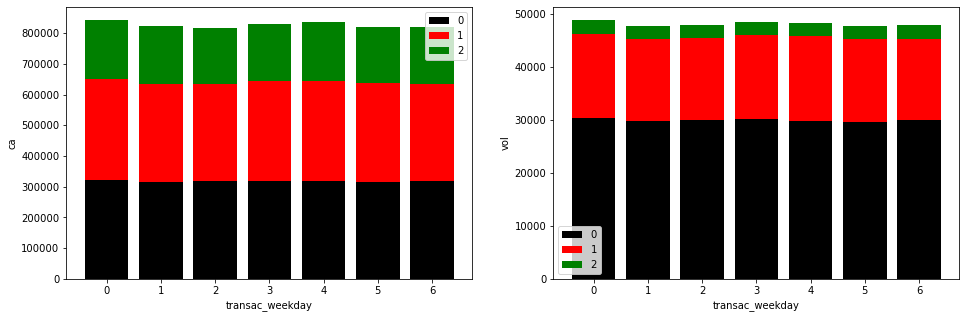

<Figure size 432x288 with 0 Axes>

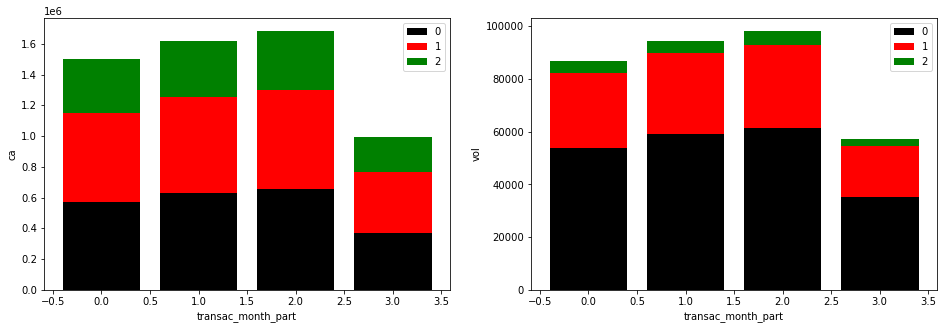

<Figure size 432x288 with 0 Axes>

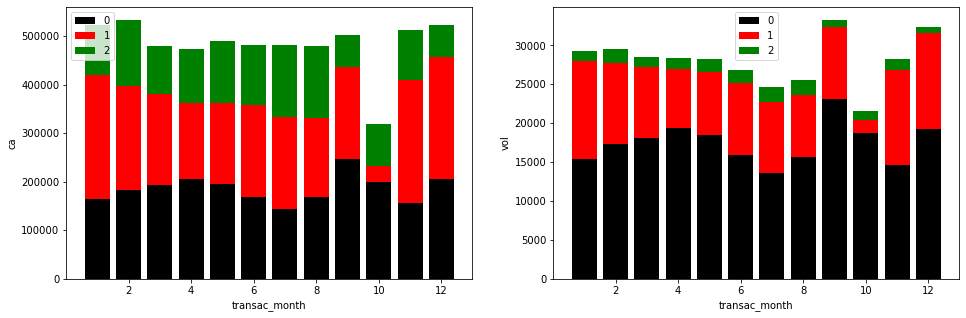

<Figure size 432x288 with 0 Axes>

In [131]:
categ_names = np.sort(transacdata.prod_cat.unique())

for time_unit in ['transac_hour', 'transac_weekday', 'transac_month_part','transac_month']:
    
   
    df = transacdata[[time_unit, 'prod_cat', 'prod_price']].groupby([time_unit, 'prod_cat']).agg({'prod_price':['sum', 'count']}).reset_index()
    df.columns = [time_unit, 'prod_cat', 'ca', 'vol']
    

    x = df[time_unit].sort_values().unique()

    
    categ_vals = []
    for cat in categ_names:
        ca = df[df.prod_cat == cat].sort_values(time_unit).ca.values
        volume = df[df.prod_cat == cat].sort_values(time_unit).vol.values
        categ_vals.append({'categ_name': cat, 'ca': ca, 'vol': volume})

    plt.figure(figsize=(16,5))
    for k, element in enumerate(['ca', 'vol']):
        plt.subplot(1,2,k+1)
        # pour le ca, puis le volume, on genere le graphique en bar
        #colors = ['royalblue', 'limegreen', 'orangered']
        colors = ['black', 'red', 'green']
        for i, cat in enumerate(categ_names):
            plt.bar(x, categ_vals[cat][element], 
                    color=colors[i],
                    label=categ_vals[cat]['categ_name'],
                    bottom = np.sum([categ_vals[j][element] for j in range(i)], axis=0))
        plt.xlabel(time_unit)
        plt.ylabel(element)
        plt.legend()

    plt.show()
    plt.savefig('transac_time')

In [132]:
df = transacdata.loc[
    :, 
    ['transac_month', 'prod_price', 'prod_cat']]

df = pd.pivot_table(df, index='transac_month', columns=['prod_cat'], aggfunc=['sum', 'count']).reset_index()
df.columns = ['transac_month', 'ca_0', 'ca_1', 'ca_2', 'vol0', 'vol1', 'vol2']

In [133]:
df = transacdata[['prod_cat', 'prod_price', 'transac_month']]
df = pd.pivot_table(df, index='transac_month', columns=['prod_cat'], aggfunc=['sum', 'count']).reset_index()
df.columns = ['t_month', 'ca_0', 'ca_1', 'ca_2', 'vol0', 'vol1', 'vol2']

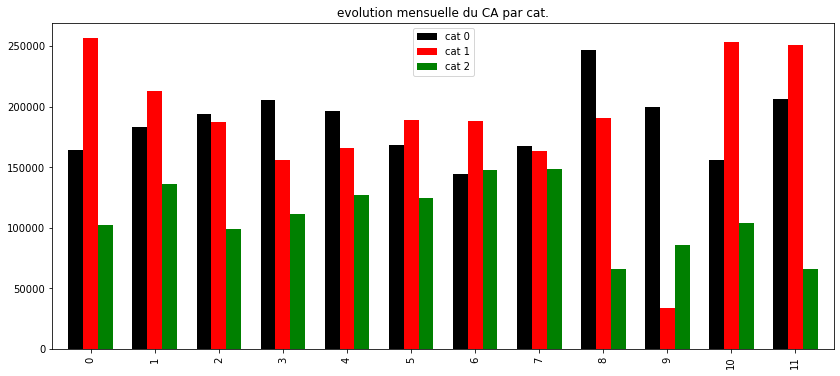

In [134]:

df[['ca_0', 'ca_1', 'ca_2']].plot.bar(
    figsize=(14,6), 
    width=0.7, 
    color=['black', 'red', 'green']
)
plt.legend(['cat 0', 'cat 1', 'cat 2'])
plt.title('evolution mensuelle du CA par cat.')
plt.savefig('evolution mensuelle du CA par cat.')

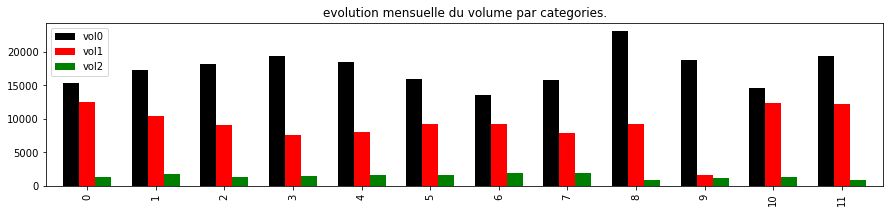

In [135]:

df[['vol0', 'vol1', 'vol2']].plot.bar(
    figsize=(15,3), 
    width=0.7, 
    color=['black', 'red', 'green']
)
plt.title('evolution mensuelle du volume par categories.')
plt.savefig('evolution mensuelle du volume par categories.')

In [136]:
df = transacdata[['transac_month_part', 'prod_price']].groupby('transac_month_part').agg({'prod_price': ['sum', 'count']}).reset_index()
df.columns = ['transac_month_part', 'ca', 'volume']

In [137]:
ca_2 = df.loc[df.transac_month_part == 2, 'ca'].values[0]
vol_2 = df.loc[df.transac_month_part == 2, 'volume'].values[0]
ca_0 = df.loc[df.transac_month_part == 0, 'ca'].values[0]
vol_0 = df.loc[df.transac_month_part == 0, 'volume'].values[0]

tx_evol_ca = (ca_2 - ca_0) / ca_0
tx_evol_vol = (vol_2 - vol_0) / vol_0

In [138]:
print(f"taux d'évolution entre le 1er et 3eme quart de mois : ")
print(f" - chiffre d'affaires : {tx_evol_ca*100:.0f}%")
print(f" - volume : {tx_evol_vol*100:.0f}%")

taux d'évolution entre le 1er et 3eme quart de mois : 
 - chiffre d'affaires : 12%
 - volume : 13%


In [139]:
ca_3 = df.loc[df.transac_month_part == 3, 'ca'].values[0]
vol_3 = df.loc[df.transac_month_part == 3, 'volume'].values[0]
ca_2 = df.loc[df.transac_month_part == 2, 'ca'].values[0]
vol_2 = df.loc[df.transac_month_part == 2, 'volume'].values[0]

tx_evol_ca = (ca_3 - ca_2) / ca_2
tx_evol_vol = (vol_3 - vol_2) / vol_2

In [140]:
print(f"taux d'évolution entre le 3eme et 4eme quart de mois : ")
print(f" - chiffre d'affaires : {tx_evol_ca*100:.0f}%")
print(f" - volume : {tx_evol_vol*100:.0f}%")

taux d'évolution entre le 3eme et 4eme quart de mois : 
 - chiffre d'affaires : -41%
 - volume : -42%


In [141]:
ca_sep = transacdata.loc[transacdata.transac_month==9, 'prod_price'].sum()
ca_oct = transacdata.loc[transacdata.transac_month==10, 'prod_price'].sum()

taux_evol_oct = (ca_oct - ca_sep) / ca_sep
taux_evol_oct

print(f"Taux d'évolution (ca) de sept. à oct.: {taux_evol_oct*100:.0f}%")

Taux d'évolution (ca) de sept. à oct.: -37%


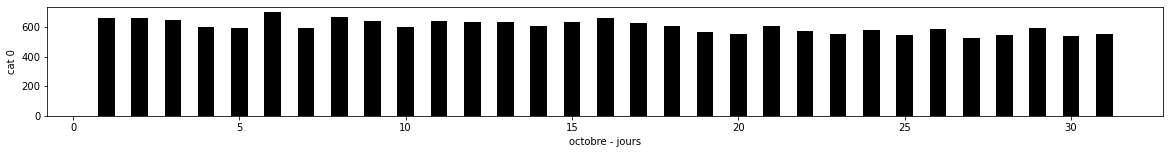

<Figure size 432x288 with 0 Axes>

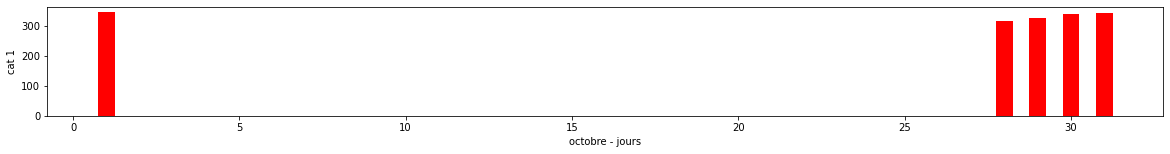

<Figure size 432x288 with 0 Axes>

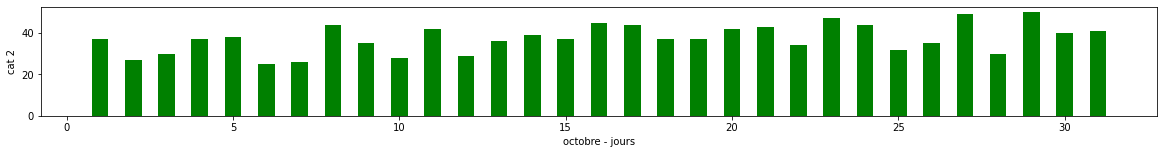

<Figure size 432x288 with 0 Axes>

In [142]:

df = transacdata.loc[transacdata.transac_month == 10, ['transac_date', 'prod_price', 'prod_cat']]
df = df.groupby([df.transac_date.dt.day, 'prod_cat']).agg({'prod_price':['sum', 'count']}).reset_index()
df.columns = ['transac_day', 'prod_cat', 'ca', 'volume']

df = pd.pivot_table(df, columns=['prod_cat'], index=['transac_day']).reset_index()
df.columns = ['transac_day', 'ca_0', 'ca_1', 'ca_2', 'vol_0', 'vol_1', 'vol_2']

color=['black', 'red', 'green']
for i, cat in enumerate([0,1,2]):
    plt.figure(figsize=(44,2))

    plt.subplot(1,2,2)
    plt.bar(df['transac_day'], df[f'vol_{cat}'], width=0.5, color=color[i])
    plt.xlabel('octobre - jours')
    plt.ylabel(f'cat {cat}')
    plt.show()
    plt.savefig('octobre')

In [143]:
products_sold = transacdata.loc[:, 'prod_id':'prod_price_range'].drop_duplicates()

In [144]:
print(f"{products_unsold.shape[0] / (products_sold.shape[0] + products_unsold.shape[0]) * 100 :.2f}% des produits sont invendus.")

0.67% des produits sont invendus.


In [145]:
categ_prices = {
    cat: products_sold.loc[
            (products_sold.prod_cat==cat)
          & (products_sold.prod_price),
        'prod_price'
        ]
    for cat in [0,1,2]}

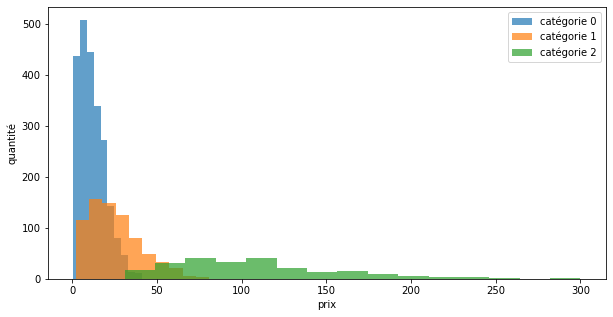

In [146]:
plt.figure(figsize=(10,5))
plt.hist(categ_prices[0], bins=10, alpha=0.7)
plt.hist(categ_prices[1], bins=10, alpha=0.7)
plt.hist(categ_prices[2], bins=15, alpha=0.7)
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])
plt.xlabel('prix')
plt.ylabel('quantité')
plt.plot()
plt.savefig('prix-quantité')

In [147]:
categ_prices[2].describe()

count    236.000000
mean     107.636017
std       49.255576
min       30.990000
25%       70.690000
50%      101.250000
75%      134.945000
max      300.000000
Name: prod_price, dtype: float64

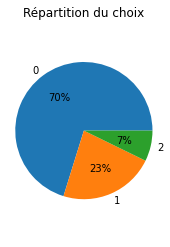

In [148]:
freqs = products_sold.prod_cat.value_counts()

plt.subplot(1,2,1)
plt.pie(freqs, autopct='%1.0f%%', labels=freqs.index.values)
plt.axis('equal')
plt.title('Répartition du choix')
plt.plot()
plt.savefig('Répartition du choix')

In [149]:
df = transacdata[['prod_cat', 'prod_price']].groupby('prod_cat').agg({'prod_price': ['count', 'sum']}).reset_index()
df.columns = ['prod_cat', 'volume', 'ca']

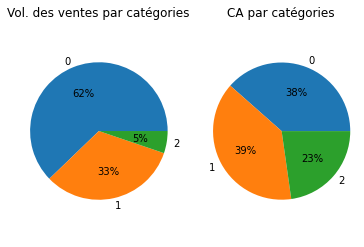

In [150]:
plt.subplot(1,2,1)
plt.pie(df.volume, autopct='%1.0f%%', labels=freqs.index.values)
plt.axis('equal')
plt.title('Vol. des ventes par catégories')
plt.plot()

plt.subplot(1,2,2)
plt.pie(df.ca, autopct='%1.0f%%', labels=freqs.index.values)
plt.axis('equal')
plt.title('CA par catégories')
plt.plot()
plt.savefig('CA par catégories')

In [151]:
df3 = transacdata[['prod_id', 'prod_price']].groupby('prod_id').agg({
    'prod_price': ['count', 'sum']
}).reset_index()
df3.columns = ['prod_id', 'transac_number', 'ca']
df3

,prod_id,transac_number,ca
0,0_0,611,2291.25
1,0_1,249,2736.51
2,0_10,12,215.40
3,0_100,2,41.20
4,0_1000,222,1518.48
...,...,...,...
3260,2_95,3,296.97
3261,2_96,281,13462.71
3262,2_97,5,804.95
3263,2_98,1,149.74


In [152]:
df32 = transacdata[['prod_id', 'prod_price']].groupby('prod_id')
df32.head()


,prod_id,prod_price
0,1_385,25.99
1,0_1110,4.71
2,0_1111,19.99
3,1_461,12.99
4,1_536,11.21
...,...,...
335789,2_82,75.81
336200,0_2200,20.47
336492,1_393,35.99
336522,2_76,254.44


indice de gini: 0.69


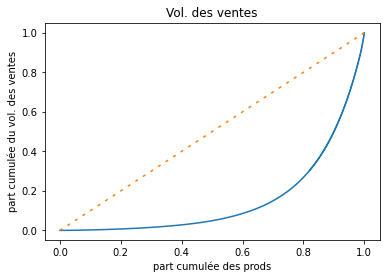

In [153]:
transac_number = df3['transac_number'].values
lorenz = np.cumsum(np.sort(transac_number)) / transac_number.sum()
lorenz = np.append([0], lorenz)

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4])
plt.xlabel('part cumulée des prods')
plt.ylabel('part cumulée du vol. des ventes')
plt.title('Vol. des ventes')
aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')


In [154]:
prod_most_sold = df3[['prod_id', 'transac_number']].sort_values('transac_number', ascending=False)[:round(len(df3)*0.2)]
percent_prod =  prod_most_sold.prod_id.count() / df3.prod_id.count() * 100
percent_ventes = prod_most_sold.transac_number.sum() / df3.transac_number.sum() * 100

print(f'{percent_ventes:.0f}% des ventes sont faites sur {percent_prod:.0f}% des produits ({len(prod_most_sold)} prod). ')

73% des ventes sont faites sur 20% des produits (653 prod). 


In [155]:
prod_most_sold.head(10)

,prod_id,transac_number
2591,1_369,1081
2644,1_417,1062
2733,1_498,1036
2641,1_414,1027
2653,1_425,1013
2622,1_398,952
2632,1_406,946
2640,1_413,944
2629,1_403,939
2633,1_407,933


indice de gini: 0.74


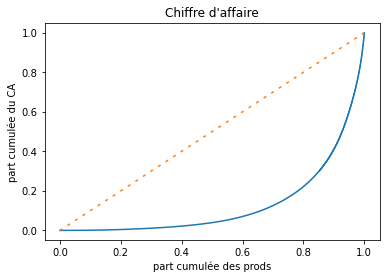

In [156]:
transac_number = df3['ca'].values
lorenz = np.cumsum(np.sort(transac_number)) / transac_number.sum()
lorenz = np.append([0], lorenz)
plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4])
plt.ylabel('part cumulée du CA')
plt.xlabel('part cumulée des prods')
plt.title("Chiffre d'affaire")
aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

In [157]:
prod_profitables = df3[['prod_id', 'ca']].sort_values('ca', ascending=False)[:round(len(df3)*0.2)]
nb_prod = len(prod_profitables)
percent_prod =  prod_profitables.prod_id.count() / df3.prod_id.count() * 100
percent_ca = prod_profitables.ca.sum() / df3.ca.sum() * 100


print(f'les {percent_prod:.0f}% produits (soit {nb_prod} produits) les plus rentables rapportent {percent_ca:.0f}% du CA.')

les 20% produits (soit 653 produits) les plus rentables rapportent 78% du CA.


In [158]:
prod_profitables.head(10)

,prod_id,ca
3070,2_135,33874.09
3045,2_112,31960.61
3034,2_102,28919.46
3152,2_209,27296.10
3043,2_110,27016.50
2591,1_369,25933.19
2619,1_395,25830.09
3104,2_166,25534.44
3206,2_43,25266.39
3201,2_39,25225.65


<ipython-input-159-3ecc4ad925af>:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  prod_profitables.prod_cat.value_counts(normalize=True).plot('pie',  autopct=lambda x:f'{x:.0f}%')


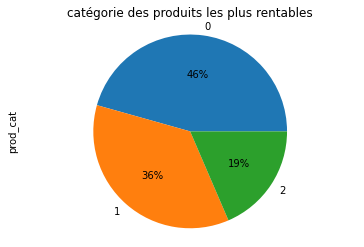

<Figure size 432x288 with 0 Axes>

In [159]:
df = products_sold[products_sold.prod_id.isin(prod_profitables.prod_id.values)]
prod_profitables = pd.merge(df, df3[['prod_id', 'transac_number']], on='prod_id')

prod_profitables.prod_cat.value_counts(normalize=True).plot('pie',  autopct=lambda x:f'{x:.0f}%')
plt.axis('equal')
plt.title('catégorie des produits les plus rentables')
plt.show()
plt.savefig('catégorie des produits les plus rentables')

In [160]:
customs_with_purchase = transacdata.loc[:,'custom_id':'custom_age_range'].drop_duplicates()

In [161]:
print(f"Cela représente {customs_no_purchase.shape[0] / (customs_no_purchase.shape[0] + customs_with_purchase.shape[0]) * 100 :.2f}% des clients.")

Cela représente 0.24% des clients.


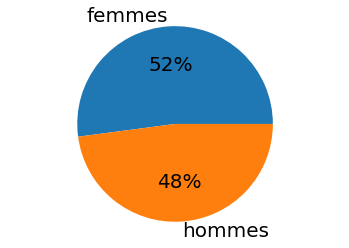

<Figure size 3600x3600 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [162]:
plt.pie(customs_with_purchase.custom_sex.value_counts(), autopct=lambda x:f'{x:.0f}%',labels=['femmes', 'hommes'], 
        textprops={'fontsize': 20})

plt.axis('equal')
plt.figure(figsize=(50,50))
plt.show()
plt.savefig('repartition')

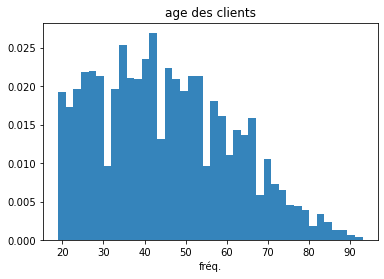

<Figure size 432x288 with 0 Axes>

In [163]:
age_ss_18 = customs_with_purchase.loc[customs_with_purchase.custom_age != 18, 'custom_age']

plt.hist(age_ss_18, density=True, bins=40, alpha=0.9)
plt.title('age des clients')
plt.xlabel('age')
plt.xlabel('fréq.')
plt.show()
plt.savefig('age des clients')

In [164]:
age_ss_18.describe()

count    8163.000000
mean       45.117236
std        16.243253
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        93.000000
Name: custom_age, dtype: float64

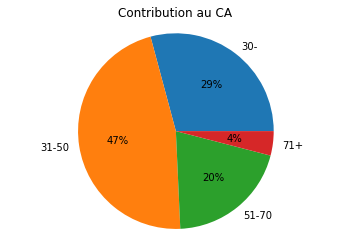

In [165]:
df = transacdata[['transac_acheteur_age_range', 'prod_price']].groupby('transac_acheteur_age_range').sum().reset_index()
plt.pie(df.prod_price, autopct='%1.0f%%', labels=df.transac_acheteur_age_range)
plt.axis('equal')
plt.title('Contribution au CA')
plt.savefig('Contribution au CA')

In [166]:
df = transacdata[['custom_id', 'prod_cat']].copy()
df['count'] = 1

df = pd.pivot_table(df, columns='prod_cat', index='custom_id', aggfunc='count').reset_index()
df.columns = ['custom_id', 'cat0', 'cat1', 'cat2']

df = df.fillna(0)
df['cat_loyal'] = df.loc[:,'cat0':'cat2'].max(axis=1) / df.loc[:,'cat0':'cat2'].sum(axis=1)
df.sample()

,custom_id,cat0,cat1,cat2,cat_loyal
2462,c_3217,6.0,9.0,0.0,0.6


In [167]:
loyal_cat = df.cat_loyal.mean()
print(f'en moyenne, {loyal_cat*100:.0f}% des produits acheté par un client proviennent de la même catégorie.')

en moyenne, 65% des produits acheté par un client proviennent de la même catégorie.


In [168]:
df = transacdata.groupby('custom_id').agg({
    'custom_age':'mean',
    'custom_sex':lambda x: x.mode(),
    'transac_sess_id':'count',
    'prod_price':['sum', 'count'],
    'prod_id': ['nunique']
    })
df = df.reset_index()
df.columns = ['custom_id', 'custom_age', 'custom_sex', 'nb_session', 'ca', 'nb_transac', 'nb_prod_diff']

In [169]:

custom_id_ab = df.loc[df.ca > 3000, 'custom_id']
transacdata.loc[transacdata.custom_id.isin(custom_id_ab), 'data_info'] = 'custom_special'

In [170]:
df[df.custom_id.isin(custom_id_ab)]

,custom_id,custom_age,custom_sex,nb_session,ca,nb_transac,nb_prod_diff
677,c_1609,42.0,m,12855,162007.340000,12855,1918
2724,c_3454,53.0,m,3275,54464.214144,3275,1092
4388,c_4958,23.0,m,2562,144257.210000,2562,466
6337,c_6714,54.0,f,4473,73218.634144,4473,1380


In [171]:
customs_ab_ca = transacdata.loc[transacdata.data_info == 'custom_special', 'prod_price'].sum()
print(f'les {len(custom_id_ab)} clients abbérants représentent {df[df.custom_id.isin(custom_id_ab)].ca.sum() / transacdata.prod_price.sum()*100:.0f}% du CA.')

les 4 clients abbérants représentent 7% du CA.


In [172]:
df = transacdata[transacdata.data_info != 'prod_imputation']\
.groupby('transac_sess_id').agg({'prod_price':['sum', 'count']}).reset_index()

df.columns = ['transac_sess_id', 'ca', 'nb_prod']

In [173]:
print(f'le panier moyen est de {df.ca.mean():.2f}€ (ecart-type de {df.ca.std():.2f}€)')

le panier moyen est de 34.27€ (ecart-type de 31.87€)


In [174]:
print(f'le panier article contient {df.nb_prod.mean():.1f} produits (ecart-type de {df.nb_prod.std():.2f})')

le panier article contient 2.0 produits (ecart-type de 1.27)


MISSION 3

In [179]:
transacdata

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,c_84,f,1982.0,40.0,31-50,0_1452,0,13.77,medium 10-19,s_92701,39.0,31-50,2021-09-20 10:11:35.510099,10.0,0.0,2,9.0,NaN
336812,c_84,f,1982.0,40.0,31-50,1_158,1,22.17,expensive 20-79,s_98493,39.0,31-50,2021-10-01 16:11:20.841361,16.0,4.0,0,10.0,NaN
336813,c_84,f,1982.0,40.0,31-50,0_1438,0,9.31,cheap 4-9,s_141701,39.0,31-50,2021-12-29 06:11:50.316631,6.0,2.0,3,12.0,NaN
336814,c_84,f,1982.0,40.0,31-50,1_459,1,15.99,medium 10-19,s_166337,40.0,31-50,2022-02-17 00:16:56.629536,0.0,3.0,2,2.0,NaN


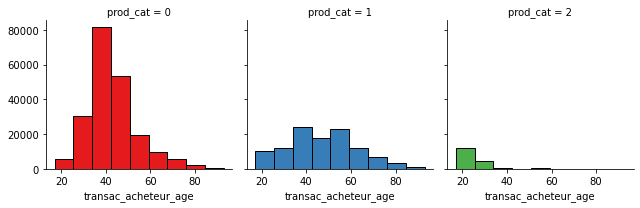

<Figure size 432x288 with 0 Axes>

In [180]:

bins = np.linspace(transacdata.transac_acheteur_age.min(), transacdata.transac_acheteur_age.max(), 10)
g = sns.FacetGrid(transacdata,col ='prod_cat', hue="prod_cat", palette="Set1")
g.map(plt.hist, 'transac_acheteur_age', bins=bins, ec="k")

plt.show()
plt.savefig('relation age-categ')

In [181]:
import pingouin as pg

aov = pg.anova(dv='custom_age', between='prod_cat', data=transactions
               
pg.print_table(aov)

SyntaxError: invalid syntax (<ipython-input-181-1576b36c39e7>, line 5)

In [183]:
df_anova= transacdata[['prod_cat', 'custom_age']]
group_anova = df_anova.groupby(['prod_cat'])
result = st.f_oneway(group_anova.get_group(0)['custom_age'],group_anova.get_group(1)['custom_age'] )
result

F_onewayResult(statistic=6172.424789427571, pvalue=0.0)

In [184]:
df_anova= transacdata[['prod_cat', 'custom_age']]
group_anova = df_anova.groupby(['prod_cat'])
result = st.f_oneway(group_anova.get_group(0)['custom_age'],group_anova.get_group(2)['custom_age'] )
result

F_onewayResult(statistic=43530.051377614676, pvalue=0.0)

In [185]:
df_anova= transacdata[['prod_cat', 'custom_age']]
group_anova = df_anova.groupby(['prod_cat'])
result = st.f_oneway(group_anova.get_group(1)['custom_age'],group_anova.get_group(2)['custom_age'] )
result

F_onewayResult(statistic=33108.32641720894, pvalue=0.0)

In [186]:
stats.levene(transacdata['custom_age'][transacdata['prod_cat'] == 0],
             transacdata['custom_age'][transacdata['prod_cat'] == 1],
             transacdata['custom_age'][transacdata['prod_cat'] == 2])

LeveneResult(statistic=13054.05284269035, pvalue=0.0)

In [187]:
from statsmodels.formula.api import ols
results = ols('custom_age ~ C(prod_cat)', data=transacdata).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             custom_age   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                 2.271e+04
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:40:55   Log-Likelihood:            -1.3338e+06
No. Observations:              336816   AIC:                         2.668e+06
Df Residuals:                  336813   BIC:                         2.668e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           43.8981      0.028   1582.839      0.000      43.844      43.952
C(prod_cat)[T.1]     3.7610      0.047     79.504      0.000       3.668       3.854
C(prod_cat)[T.2]   -18.1700      0.100   -182.145      0.000     -18.365     -17.974
==============================================================================
Omnibus:                    23876.885   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33073.113
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                       3.919   Cond. No.                         4.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
Correlation entre le sexe et la categorie de produit

SyntaxError: invalid syntax (<ipython-input-188-98d4c9d4cba9>, line 1)

In [189]:
t_ss_c_ab = transacdata[~
    transacdata.data_info.isin(
        [
            'custom_special', 
            'prod_imputation' 
        ]
    )]

age_ranges = t_ss_c_ab.custom_age_range.unique()

In [190]:
# tableau de contingence avec crosstab
tab_cont = pd.crosstab(t_ss_c_ab.prod_cat, t_ss_c_ab.custom_sex)

In [191]:
tab_cont

custom_sex,f,m
prod_cat,,
0,101206,94064
1,53774,48851
2,8122,7634


In [192]:
chi2, p, dof, expected = st.chi2_contingency(tab_cont.values)

In [193]:
chi2

10.110865513726571

In [194]:
p

0.006374607510181767

In [195]:
dof

2

In [196]:
len_i = tab_cont.shape[0]
len_j = tab_cont.shape[1]

xij = np.zeros((len_i, len_j))
for i in range(len_i):
    for j in range(len_j):
        xij[i,j] = (tab_cont.values[i,j]-expected[i,j])**2 / expected[i,j]

Xi_n = 10.110865513726571


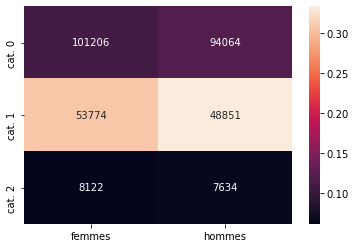

In [197]:

sns.heatmap(xij / chi2, 
            annot=tab_cont,
            fmt='d',
            yticklabels=[f'cat. {x}' for x in tab_cont.index],
            xticklabels=['femmes', 'hommes'])
plt.plot()

print(f"Xi_n = {xij.sum()}")

Age et montant des achats

In [198]:

df = t_ss_c_ab[['custom_id', 'custom_age', 'prod_price', 'custom_age_range']]

df = df.groupby('custom_id').agg({
    'custom_age': lambda x:x.mode(),
    'custom_age_range': lambda x:x.mode(),
    'prod_price':'sum'}
).reset_index()
df.columns = ['custom_id', 'custom_age', 'custom_age_range', 'amount']

df.sample()

,custom_id,custom_age,custom_age_range,amount
81,c_1071,43.0,31-50,603.37


In [199]:
df2 = df.groupby('custom_age').agg({'amount': 'mean'}).reset_index()

In [200]:

X = df2.custom_age.values
y = df2.amount.values

In [201]:

X_sm =  sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()


rsquare = model.rsquared
pval = model.pvalues[0]

In [202]:
print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

R-carré=0.56 & p-valeur=0.00


R-carré=0.56 & p-valeur=0.00


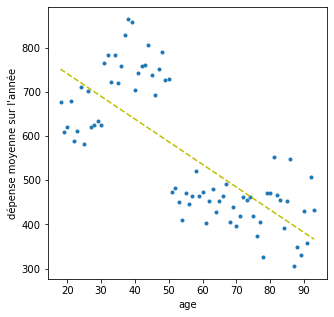

In [203]:
plt.figure(figsize=(5,5))
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_sm), 'y--')
plt.xlabel('age')
plt.ylabel('dépense moyenne sur l\'année')
print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")
plt.savefig('age-depenses sur annee')

avec l'age sous forme qualitative

In [204]:
age_ranges_amount = {age_range: df.loc[df.custom_age_range==age_range, 'amount'] for age_range in age_ranges}

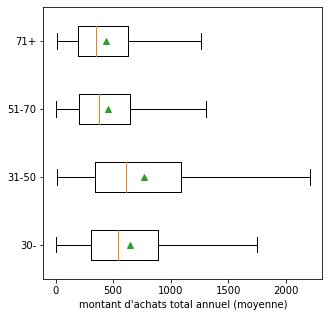

<Figure size 432x288 with 0 Axes>

In [205]:
plt.figure(figsize=(5,5))
plt.boxplot([
    age_ranges_amount['30-'],
    age_ranges_amount['31-50'],
    age_ranges_amount['51-70'],
    age_ranges_amount['71+']
], vert=False, showmeans=True, showfliers=False)

plt.xlabel("montant d'achats total annuel (moyenne)")
plt.yticks([1,2,3,4], ['30-', '31-50', '51-70', '71+'])
plt.show()
plt.savefig('montant achats total annuel')

In [206]:

f, p = st.f_oneway(
    age_ranges_amount['30-'],
    age_ranges_amount['31-50'],
    age_ranges_amount['51-70'],
    age_ranges_amount['71+']
)

In [207]:
print(f'la f-valeur vaut {f:.2f} et la p-valeur vaut {p:.2e}.')

la f-valeur vaut 267.65 et la p-valeur vaut 4.46e-166.


In [208]:
def eta2(df, quant, qual):
    
    class_valeurs = []
    for c in  df[quant].unique():
        class_valeurs.append(df.loc[df[quant]==c, qual].values)
   
    y =  np.concatenate(class_valeurs)
    moyenne_y = y.mean()

    class_info = []
    for y_i in class_valeurs:
        class_info.append({
            'n_i': len(y_i),
            'moyenne_i': y_i.mean()
        })
        
    SCE = sum([ c['n_i'] * (c['moyenne_i'] - moyenne_y)**2 for c in class_info])
    SCT = sum([(y_ij - moyenne_y)**2 for y_ij in y])
    
    return SCE / SCT

In [209]:
eta2(df, 'custom_age_range', 'amount')

0.0854661569829454

FREQUENCE d'achat

In [210]:
df = t_ss_c_ab[['custom_id', 'custom_age', 'custom_age_range', 'transac_month', 'prod_id']]


custom_ages = df[['custom_id', 'custom_age', 'custom_age_range']].drop_duplicates()


nb_achats = df[['custom_id', 'transac_month', 'prod_id']]

nb_achats = nb_achats.groupby(['custom_id', 'transac_month']).agg({'prod_id': 'count'}).reset_index()
nb_achats.columns = ['custom_id', 'transac_month', 'total_achat']

nb_achats = nb_achats.groupby('custom_id').agg({'total_achat': 'mean'}).reset_index()
nb_achats.columns = ['custom_id', 'nb_achat_mois_moy']


df2 = pd.merge(custom_ages, nb_achats, on='custom_id')

df2.sample()

,custom_id,custom_age,custom_age_range,nb_achat_mois_moy
7342,c_4105,37.0,31-50,2.833333


In [211]:
df3 = df2.groupby('custom_age').agg({'nb_achat_mois_moy': 'mean'}).reset_index()

In [212]:


X = df3.custom_age.values
y = df3.nb_achat_mois_moy.values

In [213]:

X_sm =  sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()


rsquare = model.rsquared
pval = model.pvalues[0]

R-carré=0.10 & p-valeur=0.00


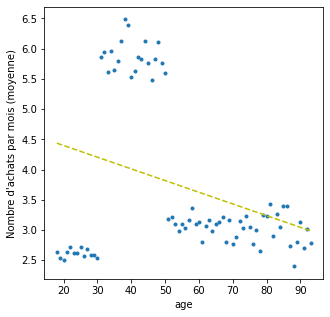

In [214]:
plt.figure(figsize=(5,5))
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_sm), 'y--')
plt.xlabel('age')
plt.ylabel("Nombre d'achats par mois (moyenne)")
plt.plot()

print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

la taille du panier moyen

In [215]:
df = t_ss_c_ab[['custom_id', 'custom_age', 'custom_age_range', 'transac_sess_id', 'prod_id']]

c_ages = df[['custom_id', 'custom_age', 'custom_age_range']].drop_duplicates()

panier_moy = df[['custom_id', 'transac_sess_id', 'prod_id']]

panier_moy = panier_moy.groupby(['custom_id', 'transac_sess_id']).count().reset_index()
panier_moy.columns = ['custom_id', 'transac_sess_id', 'nb_prods']

panier_moy = panier_moy.groupby('custom_id').agg({'nb_prods': 'mean'}).reset_index()
panier_moy.columns = ['custom_id', 'panier_moy']

df2 = pd.merge(c_ages, panier_moy, on='custom_id')
df2.sample()

,custom_id,custom_age,custom_age_range,panier_moy
6449,c_6501,25.0,30-,3.0


In [216]:
df3 = df2.groupby('custom_age').agg({'panier_moy': 'mean'}).reset_index()

In [217]:

X = df3.custom_age.values
y = df3.panier_moy.values

In [218]:

X_sm =  sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()


rsquare = model.rsquared
pval = model.pvalues[0]

R-carré=0.32 & p-valeur=0.00


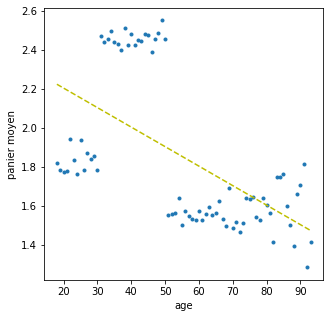

In [219]:
plt.figure(figsize=(5,5))
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_sm), 'y--')
plt.xlabel('age')
plt.ylabel("panier moyen")
plt.plot()

print(f"R-carré={rsquare:.2f} & p-valeur={pval:.2f}")

les catégories de produits achetés

In [220]:
df = t_ss_c_ab

In [221]:
cats = t_ss_c_ab.prod_cat.unique()
cats

array([1, 0, 2], dtype=int64)

In [222]:
cat_ages = {cat: t_ss_c_ab.loc[t_ss_c_ab['prod_cat']==cat, 'transac_acheteur_age'] for cat in cats}

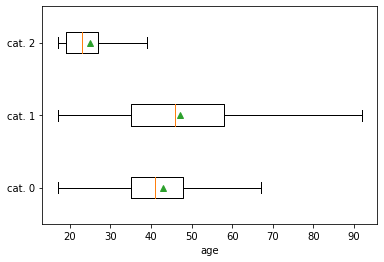

In [223]:
plt.boxplot([
    cat_ages[0],
    cat_ages[1],
    cat_ages[2]
],
    labels=['cat. 0', 'cat. 1', 'cat. 2'],
    vert=False, showmeans=True, showfliers=False
)
plt.xlabel('age')
plt.show()

In [224]:
f, p = st.f_oneway(cat_ages[0], cat_ages[1], cat_ages[2])

print(f'la f-valeur vaut {f:.2f} et la p-valeur vaut {p}.')

la f-valeur vaut 19993.38 et la p-valeur vaut 0.0.


In [225]:
eta2(df, 'custom_age_range', 'prod_cat')

0.26616936967591126

In [226]:

tab_cont = pd.crosstab(t_ss_c_ab.prod_cat, t_ss_c_ab.custom_age_range)

In [227]:

chi2, p, dof, expected = st.chi2_contingency(tab_cont.values)

In [228]:
print(f'Le khi-2 est de {chi2:.2f} et la p-val est de {p}')

Le khi-2 est de 137138.13 et la p-val est de 0.0


In [231]:
transacdata

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,c_84,f,1982.0,40.0,31-50,0_1452,0,13.77,medium 10-19,s_92701,39.0,31-50,2021-09-20 10:11:35.510099,10.0,0.0,2,9.0,NaN
336812,c_84,f,1982.0,40.0,31-50,1_158,1,22.17,expensive 20-79,s_98493,39.0,31-50,2021-10-01 16:11:20.841361,16.0,4.0,0,10.0,NaN
336813,c_84,f,1982.0,40.0,31-50,0_1438,0,9.31,cheap 4-9,s_141701,39.0,31-50,2021-12-29 06:11:50.316631,6.0,2.0,3,12.0,NaN
336814,c_84,f,1982.0,40.0,31-50,1_459,1,15.99,medium 10-19,s_166337,40.0,31-50,2022-02-17 00:16:56.629536,0.0,3.0,2,2.0,NaN


In [232]:
df11 = transacdata.groupby('transac_date')[ca].sum().reset_index()
df11


KeyError: 'Columns not found: 102524.72000000114, 136479.72000000215, 148635.99000000124, 104136.00000000128, 98771.48000000117, 124209.56000000205, 147663.47000000157, 65893.28999999982, 65934.4899999998, 127359.59000000212, 86179.70000000038, 111682.70000000164'